# Sending emails 

To send emails with python, we have to take several steps:

1. connecting to an email server
2. confirming connection
3. setting a proticol
4. logging on
5. sending the message

Fortunately, the built in smtplib library from Python makes these steps as easy as basic function calls. Each major email provider has their own SMTP (Simple Mail Trnasfer Protocol) server. For example, Outlook or Hotmail has smtp-mail.outlook.com and Gmail has smtp.gmail.com. Let's start by importing smtplib

In [1]:
import smtplib

Let's create an smtp object with a Gmail account:

In [2]:
#The second parameter is the port number we will use to connect to the server. We will use 587, but if it doesn't
#work, you can use 465. If that also doesn't work, just don't pass any number in as a port number.
smtp_object = smtplib.SMTP('smtp.gmail.com',587)

Now, we need to run an EHLO method command, which greets the server and establishes the connection between the two (step 1 and step 2). NOTE: this needs to be run right after the above funciton call, otherwise there will be errors in connecting later on.

In [3]:
smtp_object.ehlo()

(250,
 b'smtp.gmail.com at your service, [73.157.111.44]\nSIZE 35882577\n8BITMIME\nSTARTTLS\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8')

This output says that the connection was successfull. When we use port 587, we use TLS encryption. To initiate the encryption, let's call a method on our smtp object:

In [4]:
smtp_object.starttls()

(220, b'2.0.0 Ready to start TLS')

Now, it's time to log in with our email and password. __NOTE: VERY IMPORTANT__: Never store your email and password in a script, because that makes it so that anyone who sees the script can then see the email and the password. WHat we will do instead is use the input() function to get that information so that the password is not stored. If you want to hide your password, you can use the builtin 'get pass' library that will hide your password as you type it in. Let's try showing how the input variable would work

In [5]:
password = input('What is your password: ')

What is your password: password


As you can see, the password there is visible to someone who is watching your computer. To use the get pass thing, we first have to import it:

In [6]:
import getpass

In [7]:
password = getpass.getpass('What is your password: ')

What is your password: ········


As you can see, the password is blurred out. We can still run the variable to get the password:

In [8]:
password

'This password is secure!'

We can also use the 'show' button if we want to see the password anyways as we type:

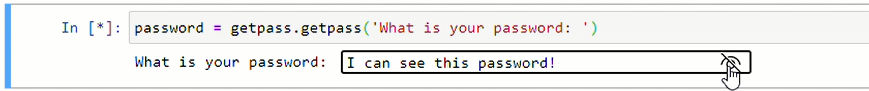

Now, for gmail, we need to enable an app password and 2-step authentificaiton so that we can do the procedure here. ONce we set up 2 factor auth, we have created the App Password for Script Python. Our app password can be found on the sticky note titled GMAIL APP PASSWORD. Now, let's set up our getpass stuff to login to the smtp object:

In [10]:
email = getpass.getpass("Email: ")
password = getpass.getpass("Password: ")
smtp_object.login(email, password)

Email: ········
Password: ········


(235, b'2.7.0 Accepted')

Now, we are able to send emails through python. To do this, we will need a from adress (the email which you will be sending from), a to adress (who you want to send the email to), a subject line, and a body message. Let's send ourselves an email called "This Message Sent From Python" with a body of "This message was sent from python! Woo!":

In [15]:
from_address = email
to_address = email
subject = "This Message Sent From Python"
body = "This message was sent from python!"

Now, the way our message is structured is as follows:
***
"Subject: *insert subject here* \n *rest of the message*"

In [13]:
message = "Subject: " + subject + '\n' + body

Now, we will use the sendmail() method on our smtp object to send this mail:

In [16]:
smtp_object.sendmail(from_address, to_address, message)

{}

Hooray! This message sent! Now, we will want to close and kill our session:

In [17]:
smtp_object.quit()

(221, b'2.0.0 closing connection c62sm6251172pfa.12 - gsmtp')

# Receiving Emails

To see recieved emails, we can use the imaplib and email libraries in python. Imaplib has a special syntax which allows you to search your inbox. Here is a table of all the keywords we can use here:

<table border='1' >
    <tr >
        <th align='center'>Keyword </th>
        <th align='center'>Definition</th>
    </tr>
    <tr>
        <td>'ALL'</td>
        <td>
        Returns all messages in your email folder. Often there are size limits from imaplib.
        To change these use imaplib._MAXLINE = 100 , where 100 is whatever you want the limit to be.
        </td>
    </tr>
    <tr>
        <td>'BEFORE date'</td>
        <td>
        Returns all messages before the date. Date must be formatted as 01-Nov-2000.
        </td>
    </tr>
     <tr>
        <td>'ON date'</td>
        <td>
        Returns all messages on the date. Date must be formatted as 01-Nov-2000.
        </td>
    </tr>
     <tr>
        <td>'SINCE date'</td>
        <td>
        Returns all messages after the date. Date must be formatted as 01-Nov-2000.
        </td>
    </tr>
    <tr>
        <td>'FROM some_string '</td>
        <td>
        Returns all from the sender in the string. String can be an email, for example 'FROM               user@example.com' or just a string that may appear in the email, "FROM example"
        </td>
    </tr>
    <tr>
        <td>'TO some_string'</td>
        <td>
        Returns all outgoing email to the email in the string. String can be an email, for example 'FROM user@example.com' or just a string that may appear in the email, "FROM example"
        </td>
    </tr>
    <tr>
        <td>'CC some_string' and/or 'BCC some_string'</td>
        <td>
        Returns all messages in your email folder. Often there are size limits from imaplib.
        To change these use imaplib._MAXLINE = 100 , where 100 is whatever you want the limit to be.
        </td>
    </tr>
    <tr>
        <td>'SUBJECT string','BODY string','TEXT "string with spaces"'</td>
        <td>
        Returns all messages with the subject string or the string in the body of the email. If the string you are searching for has spaces in it, wrap it in double quotes.
        </td>
    </tr>
    <tr>
        <td>'SEEN', 'UNSEEN'</td>
        <td>
        Returns all messages that have been seen or unseen. (Also known as read or unread)
        </td>
    </tr>
        <tr>
        <td>'ANSWERED', 'UNANSWERED'</td>
        <td>
        Returns all messages that have been replied to or unreplied to. 
        </td>
    </tr>
        <tr>
        <td>'DELETED', 'UNDELETED'</td>
        <td>
        Returns all messages that have been deleted or that have not been deleted.
        </td>
    </tr>
</table>

What this allows you to do is to search for specific things in your email inbox. 
***
Send yourself an email with a unique subject line. The subject we will use is "TEST EMAIL 6.14.2021". Now, let's import the imaplib library:

In [1]:
import imaplib

In [3]:
M = imaplib.IMAP4_SSL('imap.gmail.com')

What we have done is created an instance of the imaplib thing and put in the imap server for gmail. Now, we need to grab the password and email:

In [4]:
import getpass

In [5]:
email = getpass.getpass("Email: ")

Email: ········


In [6]:
#NOTE: the password here is the app password used before
password = getpass.getpass("Password: ")

Password: ········


Now, we need to login with our email and password:

In [7]:
M.login(email, password)

('OK', [b'aadiadgaonkar@gmail.com authenticated (Success)'])

We see a success statement come out, meaning that we did this right. Now, let's se the list of this item:

In [8]:
M.list()

('OK',
 [b'(\\HasNoChildren) "/" "INBOX"',
  b'(\\HasChildren \\Noselect) "/" "[Gmail]"',
  b'(\\All \\HasNoChildren) "/" "[Gmail]/All Mail"',
  b'(\\Drafts \\HasNoChildren) "/" "[Gmail]/Drafts"',
  b'(\\HasNoChildren \\Important) "/" "[Gmail]/Important"',
  b'(\\HasNoChildren \\Sent) "/" "[Gmail]/Sent Mail"',
  b'(\\HasNoChildren \\Junk) "/" "[Gmail]/Spam"',
  b'(\\Flagged \\HasNoChildren) "/" "[Gmail]/Starred"',
  b'(\\HasNoChildren \\Trash) "/" "[Gmail]/Trash"'])

These are all the folders and things that we can see in our gmail. Let's grab our inbox:

In [30]:
M.select('inbox')

('OK', [b'125'])

Now that we have logged in, we can search our inbox using the syntax from above. Let's search using the subject line thing:

In [31]:
typ, data = M.search(None, 'SUBJECT "TEST EMAIL 6.14.2021"')

In [32]:
typ

'OK'

In [33]:
data

[b'125']

This output an ID which represented the email - this isn't the email itself. Now, we need to fetch the data itself: 

In [34]:
email_id = data[0]

In [35]:
#NOTE: The method here takes in 2 parameters - the email id and a protocol. The protocol
#we pass in is '(RFC822)'
result, email_data = M.fetch(email_id, '(RFC822)')

In [36]:
result

'OK'

In [37]:
email_data

[(b'125 (RFC822 {2672}',
  b'Return-Path: <aadiadgaonkar@gmail.com>\r\nReceived: from Aadispc (c-73-157-111-44.hsd1.wa.comcast.net. [73.157.111.44])\r\n        by smtp.gmail.com with ESMTPSA id lw3sm12926619pjb.1.2021.06.14.16.12.30\r\n        for <aadiadgaonkar@gmail.com>\r\n        (version=TLS1_2 cipher=ECDHE-ECDSA-AES128-GCM-SHA256 bits=128/128);\r\n        Mon, 14 Jun 2021 16:12:30 -0700 (PDT)\r\nFrom: <aadiadgaonkar@gmail.com>\r\nTo: <aadiadgaonkar@gmail.com>\r\nSubject: TEST EMAIL 6.14.2021\r\nDate: Mon, 14 Jun 2021 16:12:28 -0700\r\nMessage-ID: <000001d76172$bf4783a0$3dd68ae0$@gmail.com>\r\nMIME-Version: 1.0\r\nContent-Type: multipart/alternative;\r\n\tboundary="----=_NextPart_000_0001_01D76138.12EA8060"\r\nX-Mailer: Microsoft Outlook 16.0\r\nThread-Index: Addhcrxr+TleF6FqRR+m1UVt96Hb0w==\r\nContent-Language: en-us\r\n\r\nThis is a multipart message in MIME format.\r\n\r\n------=_NextPart_000_0001_01D76138.12EA8060\r\nContent-Type: text/plain;\r\n\tcharset="us-ascii"\r\nContent

This email data is just a bunch of data shown here. We have to index this to grab the message contents themselves:

In [38]:
raw_email = email_data[0][1]

In [39]:
#NOTE: We are decoding it with utf-8 so that the message is readable and so that we don't
#have any errors with things like @ symbols. 
raw_email_string = raw_email.decode('utf-8')

Now, to parse the string, we need to use the email library:

In [40]:
import email

In [41]:
email_message = email.message_from_string(raw_email_string)

Now, we need to take our email message object, which is an iterator, and iterate through it:

In [42]:
for part in email_message.walk():
    
    if part.get_content_type() == 'text/plain':
        body = part.get_payload(decode = True)
        print(body)

b'TEST EMAIL 6.14.2021\r\n\r\n'


What this above code has done is gone through the code and separated the text from the junk, and found the message. It then took the payload and decoded it, then printing out the text. 

___NOW,___ let's go over all the steps to get the email:

1. We import the imaplib library and connect to the imap server
2. We grab the email and password, then we log in
3. We select the inbox or folder we want to search
4. We search for emails using the specific syntax
5. We grab the data associated with the email by grabbing its ID
6. We fetch the email associated with that ID
7. We decode the email data and use the email library to grab the message from the data